# Exercise 8 - Categorical Data and Hyperparameter-Tuning
I will provide the required library imports for this task for you

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import model_selection
#Neural network module
from keras.models import Sequential 
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

## 1 Get and preprocess the data
### 1.1 Read the data into a pandas data table

In [145]:
df=pd.read_csv("./iris.csv", delimiter=",")
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.2 Change your categorical labels to numeric values
Note that categorical data requires special handling. If either our input features or data labels are categorical values (eg "apples", "oranges", "bananas") we need to somehow transform them into numerical input or label values, respectively. For this we have two options:

1) Encode the categories directly to numeric values (Example: Apple: 1, Orange: 2, Banana: 3) -> Disadvantage is that some categories then have larger values on the scale then others - unintentionally.
2) Use One-hot encoding: Each category stands for a number of zeros equal to the overall number of categories minus one, embedding a single one entry for the chosen category:

Example One-Hot Encoding

Apple  0 0 1

Orange 0 1 0

Banana 1 0 0

Use LabelEncoder to add another column containing the numeric label values. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

In [146]:
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class_numeric'] = le.transform(df['class'])


## 1.3 Perform train-test-split and normalize

In [147]:
X = df[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
y = df['class_numeric'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X , y, test_size=0.1)
scaler = preprocessing.StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## 1.4 Create a function to create a model called create_model()
- Define a Sequential model (the link below should be helpful)
https://www.tensorflow.org/guide/keras/sequential_model
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Implement a neural network with one hidden layer
    - Layer 1: 8 Neurons (ReLU activation)
- Before returning the model compile the model choosing the appropriate loss function, set optimizer to "adam", and choose metrics=['accuracy']

In [148]:
def create_model():
    model=Sequential()
    model.add(layers.Dense(8,input_dim=4,activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

## 1.5 Change the label to one hot vector

In [149]:
#[0]->[1 0 0]
#[1]->[0 1 0]
#[2]->[0 0 1]

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of y_train (135, 3)
Shape of y_test (15, 3)


## 1.6 Create and fit model and predict labels

In [150]:
mymodel = create_model()
history = mymodel.fit(X_train_normalized,y_train,validation_data=(X_test_normalized, y_test), batch_size=5,epochs=200,verbose=2)

Epoch 1/200


27/27 - 0s - loss: 1.5328 - accuracy: 0.1778 - val_loss: 1.4283 - val_accuracy: 0.1333 - 422ms/epoch - 16ms/step
Epoch 2/200
27/27 - 0s - loss: 1.4293 - accuracy: 0.2222 - val_loss: 1.3272 - val_accuracy: 0.1333 - 37ms/epoch - 1ms/step
Epoch 3/200
27/27 - 0s - loss: 1.3390 - accuracy: 0.2667 - val_loss: 1.2455 - val_accuracy: 0.1333 - 39ms/epoch - 1ms/step
Epoch 4/200
27/27 - 0s - loss: 1.2630 - accuracy: 0.3185 - val_loss: 1.1772 - val_accuracy: 0.1333 - 40ms/epoch - 1ms/step
Epoch 5/200
27/27 - 0s - loss: 1.1952 - accuracy: 0.3630 - val_loss: 1.1231 - val_accuracy: 0.2667 - 39ms/epoch - 1ms/step
Epoch 6/200
27/27 - 0s - loss: 1.1356 - accuracy: 0.4222 - val_loss: 1.0767 - val_accuracy: 0.4000 - 39ms/epoch - 1ms/step
Epoch 7/200
27/27 - 0s - loss: 1.0804 - accuracy: 0.5037 - val_loss: 1.0350 - val_accuracy: 0.4000 - 38ms/epoch - 1ms/step
Epoch 8/200
27/27 - 0s - loss: 1.0304 - accuracy: 0.4889 - val_loss: 0.9983 - val_accuracy: 0.4000 - 39ms/epoch - 1ms/step
Epoch 9/200
27/27 - 0s - l

In [151]:
prediction=mymodel.predict(X_test_normalized)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 36ms/step
Accuracy of the dataset 93.33333333333333


## 1.7 Plot history

In [155]:
def plot_loss(history):
    fig, ax = plt.subplots(2)

    ax[0].plot(history.history['accuracy'], label='train accuracy')
    ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].grid()


    ax[1].plot(history.history['loss'], label='train loss')
    ax[1].plot(history.history['val_loss'], label='validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Acc')
    ax[1].set_ylim([0, 1])
    ax[1].grid()
    plt.legend()
    plt.grid(True)

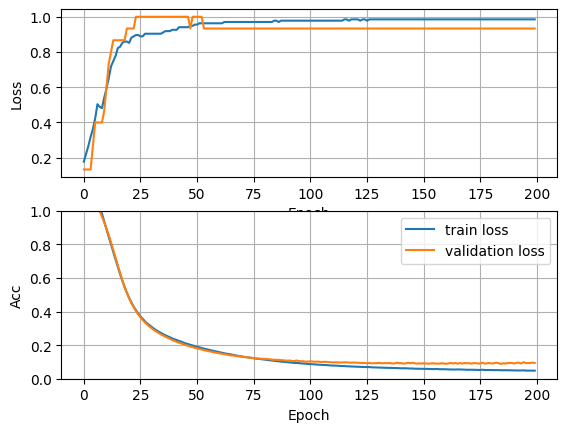

In [156]:
plot_loss(history)

## 1.8 Use the sklearn GridSearchCV functionality for hyperparameter-tuning
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

Tune the hyperparameters batch_size (batch_size=[5,10,20]) and epochs (epochs = [10,50,100,200,300])

In [163]:
# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [5,10, 20]
epochs = [10,50,100,200,300]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_normalized, y_train)

## 1.9 Summarize the results

In [164]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940741 using {'batch_size': 20, 'epochs': 300}
0.725926 (0.146659) with: {'batch_size': 5, 'epochs': 10}
0.866667 (0.113312) with: {'batch_size': 5, 'epochs': 50}
0.933333 (0.054433) with: {'batch_size': 5, 'epochs': 100}
0.933333 (0.048005) with: {'batch_size': 5, 'epochs': 200}
0.933333 (0.048005) with: {'batch_size': 5, 'epochs': 300}
0.511111 (0.083148) with: {'batch_size': 10, 'epochs': 10}
0.844444 (0.118981) with: {'batch_size': 10, 'epochs': 50}
0.874074 (0.120811) with: {'batch_size': 10, 'epochs': 100}
0.925926 (0.055432) with: {'batch_size': 10, 'epochs': 200}
0.925926 (0.052378) with: {'batch_size': 10, 'epochs': 300}
0.674074 (0.103173) with: {'batch_size': 20, 'epochs': 10}
0.718519 (0.075541) with: {'batch_size': 20, 'epochs': 50}
0.822222 (0.136987) with: {'batch_size': 20, 'epochs': 100}
0.918519 (0.063721) with: {'batch_size': 20, 'epochs': 200}
0.940741 (0.041903) with: {'batch_size': 20, 'epochs': 300}


## 1.0 Fit and predict the tuned model

In [167]:
model=create_model()
history=model.fit(X_train_normalized,y_train,validation_data=(X_test_normalized, y_test), batch_size=5,epochs=200,verbose=2)
prediction=model.predict(X_test_normalized)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Epoch 1/200
27/27 - 0s - loss: 1.0613 - accuracy: 0.3778 - val_loss: 1.0183 - val_accuracy: 0.6000 - 406ms/epoch - 15ms/step
Epoch 2/200
27/27 - 0s - loss: 0.9779 - accuracy: 0.5778 - val_loss: 0.9537 - val_accuracy: 0.6000 - 41ms/epoch - 2ms/step
Epoch 3/200
27/27 - 0s - loss: 0.9090 - accuracy: 0.6741 - val_loss: 0.8944 - val_accuracy: 0.6000 - 51ms/epoch - 2ms/step
Epoch 4/200
27/27 - 0s - loss: 0.8507 - accuracy: 0.7481 - val_loss: 0.8410 - val_accuracy: 0.7333 - 38ms/epoch - 1ms/step
Epoch 5/200
27/27 - 0s - loss: 0.8015 - accuracy: 0.7778 - val_loss: 0.7918 - val_accuracy: 0.7333 - 41ms/epoch - 2ms/step
Epoch 6/200
27/27 - 0s - loss: 0.7533 - accuracy: 0.8000 - val_loss: 0.7474 - val_accuracy: 0.8000 - 38ms/epoch - 1ms/step
Epoch 7/200
27/27 - 0s - loss: 0.7106 - accuracy: 0.8000 - val_loss: 0.7023 - val_accuracy: 0.8667 - 40ms/epoch - 1ms/step
Epoch 8/200
27/27 - 0s - loss: 0.6723 - accuracy: 0.8148 - val_loss: 0.6585 - val_accuracy: 0.8667 - 39ms/epoch - 1ms/step
Epoch 9/200
27

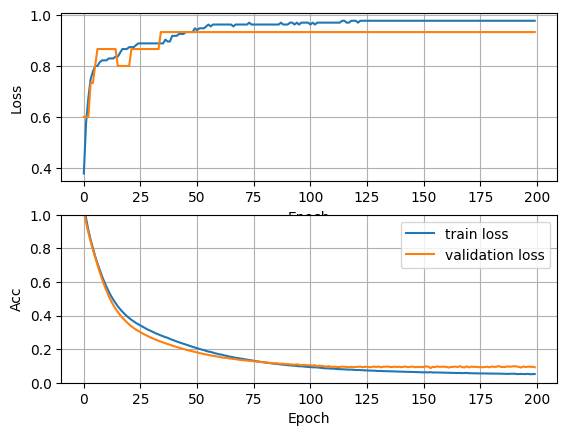

In [168]:
plot_loss(history)